# Mini-Projet

Reconnaissance de chiffres manuscrits

### Charge le jeu de données MINIT

In [2]:
from sklearn.datasets import load_digits
import pandas as pd

mnist = load_digits()
x = pd.DataFrame(mnist.data)  # représente les données
y = pd.DataFrame(mnist.target)  # représents les valeurs cibles

### Afficher les dimensions des données

In [3]:
shape_x = mnist.data.shape
print('Nombre de lignes des données: ', shape_x[0])
print('Nombre de colonnes: ', shape_x[1])

Nombre de lignes des données:  1797
Nombre de colonnes:  64


### Afficher les premiéres lignes de la base de sonnées

In [4]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Afficher le premier et le dernier élément

In [5]:
import matplotlib.pyplot as plt
def displayImage(i):
    plt.imshow(mnist['images'][i], cmap="Greys_r")
    plt.show()


le chiffre 0

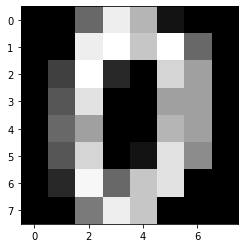

In [9]:
displayImage(0)

le chiffre 9

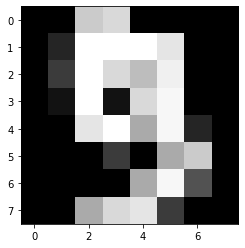

In [10]:
displayImage(9)

### Préparation des données

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target,train_size=0.80)

### Classification avex avec Bayésien naif

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

### Effectuer les prédictions

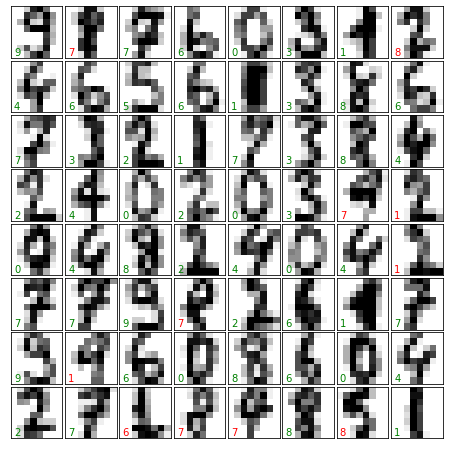

In [8]:
pred = model.predict(x_test)

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if pred[i] == y_test[i]:
        ax.text(0, 7, str(pred[i]), color='green')
    else:
        ax.text(0, 7, str(pred[i]), color='red')


### matrice de confusion (confusion matrix) et le rapport de classification.

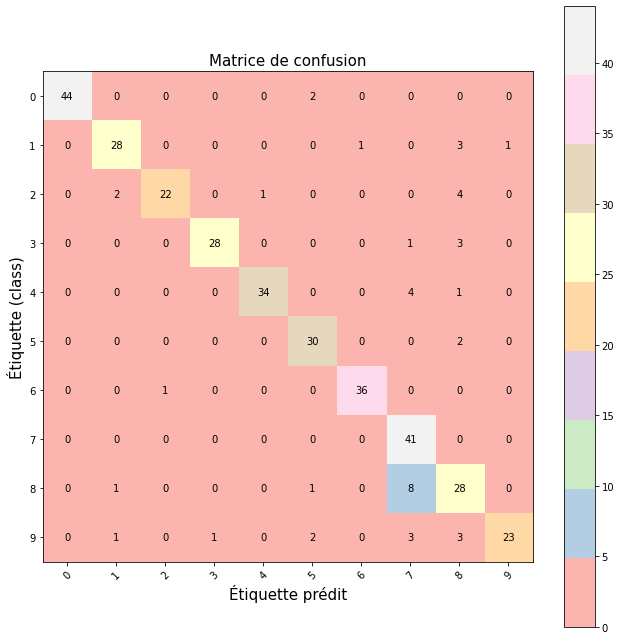

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Matrice de confusion', size = 15)
plt.colorbar()
tick_marks = [i for i in range(10)]
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Étiquette (class)', size = 15)
plt.xlabel('Étiquette prédit', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

###  10-fold cross-validation 

In [10]:
print('Test Accuracy : %.3f'%model.score(x_test, y_test)) 
print('Training Accuracy : %.3f'%model.score(x_train, y_train))

Test Accuracy : 0.872
Training Accuracy : 0.875


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=10)
print(scores)

[0.80555556 0.88194444 0.84027778 0.84722222 0.81944444 0.86805556
 0.88194444 0.87412587 0.87412587 0.83916084]
